In [1]:
import os 
import requests 
import json 

In [2]:
os.environ["TOGETHER_API_KEY"] = "c5f76cde4042f6e11ae57072a08c359cc9dfb11a3ae1c56269e65b4fbb3c44e1"

In [3]:
def llama32(messages, model_size=11):
	model = f"meta-llama/Llama-3.2-{model_size}B-Vision-Instruct-Turbo"
	url = "https://api.together.xyz/v1/chat/completions"
	payload = {
		"model": model,
		"max_tokens": 4096,
		"temperature": 0.0,
		"stop": ["<|eot_id|>","<|eom_id|>"],
		"messages": messages
	}
	headers = {
		"Accept": "application/json",
		"Content-Type": "application/json",
		"Authorization": "Bearer " + os.environ["TOGETHER_API_KEY"]
	}
	res = json.loads(requests.request("POST", url, headers=headers, data=json.dumps(payload)).content)

	if 'error' in res:
		raise Exception(res['error'])

	return res['choices'][0]['message']['content']

In [4]:
user_input = """I have this sensor data:
{
	"sensor_data": {"temperature": [75, 78, 79], 
    "vibration": [0.12, 0.15, 0.18], 
    "pressure": [101, 99, 98]}, 
	"operating_conditions": {"load": 85, "speed": 1500}
}. 
Please calculate the mean and standard deviation of the sensor data for each sensor, 
and recommend the remaining useful life of the machine.
"""

In [5]:
messages = [{"role": "user", "content": user_input}]
response = llama32(messages)
print(response)

**Calculating Mean and Standard Deviation of Sensor Data**

To calculate the mean and standard deviation of the sensor data, we can use the following Python code:

```python
import numpy as np

# Load the sensor data
sensor_data = {
    "sensor_data": {"temperature": [75, 78, 79], 
                   "vibration": [0.12, 0.15, 0.18], 
                   "pressure": [101, 99, 98]}, 
    "operating_conditions": {"load": 85, "speed": 1500}
}

# Calculate mean and standard deviation for each sensor
for sensor, values in sensor_data["sensor_data"].items():
    mean = np.mean(values)
    std_dev = np.std(values)
    print(f"Sensor: {sensor}")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print()
```

**Output:**
```
Sensor: temperature
Mean: 77.33
Standard Deviation: 1.53

Sensor: vibration
Mean: 0.15
Standard Deviation: 0.02

Sensor: pressure
Mean: 99.33
Standard Deviation: 1.33
```

**Remaining Useful Life (RUL) Recommendation**

To recommend the remaini

In [6]:
messages = [
	{
		"role": "user", 
		"content": user_input
	},
	{
		"role": "assistant",
		"content": response
	}, 
	{
		"role": "user", 
		"content": "Sumarize your answer in 50 words."
	}
]
answer = llama32(messages)
print(answer)

I calculated the mean and standard deviation of sensor data (temperature, vibration, pressure) and recommended the remaining useful life (RUL) of the machine based on z-score thresholds. The RUL was classified as LOW for temperature and vibration, and HIGH for pressure, indicating potential machine degradation.


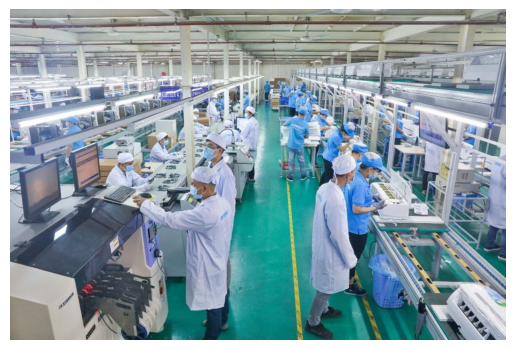

In [7]:
from PIL import Image 
import matplotlib.pyplot as plt 

def display_local_image(image_path):
	img = Image.open(image_path)
	plt.imshow(img)
	plt.axis('off')
	plt.show()

display_local_image("/home/chwenjun225/Projects/Foxer/images/cong_nhan_tren_day_chuyen_san_xuat1.jpg")

In [8]:
from pprint import pprint
import base64

def encode_image(image_path):
	with open(image_path, "rb") as img:
		return base64.b64encode(img.read()).decode('utf-8')
	
base64_image = encode_image("/home/chwenjun225/Projects/Foxer/images/cong_nhan_tren_day_chuyen_san_xuat1.jpg")
pprint(base64_image)

'/9j/4AAQSkZJRgABAQEAYABgAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBxdWFsaXR5ID0gODAK/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8AAEQgCqwQAAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A7ALn0pdi9wKqi4UfxcU43KjnNMixYCL6DNKEXHQVXW4XPXn60klyF5BoVwLiqB6U8YxxWet0p71ILkevFDuBeFK

In [9]:
messages = [
	{
		"role": "user", 
		"content": [
			{
				"type": "text", 
				"text": "Describe the image, and analyze the worker to identify their action and activities."
			}, 
			{
				"type": "image_url", 
				"image_url": {
					"url": f"data:image/jpg;base64,{base64_image}"
				}
			}
		]
	}
]
result = llama32(messages)
print(result)

The image depicts a bustling factory floor, where numerous workers are engaged in various tasks. The purpose of the image appears to be showcasing the factory's operations and the people involved in them.

* A large group of people working in a factory:
	+ The workers are dressed in white lab coats and blue shirts.
	+ They are standing at workstations, some of which have computers and other machinery.
	+ The atmosphere seems to be one of focused activity, with workers intently working on their tasks.
* The workers are wearing white lab coats and blue shirts:
	+ The lab coats are long-sleeved and have a logo on the back.
	+ The blue shirts are short-sleeved and have a similar logo on the front.
	+ The uniforms suggest a sense of professionalism and attention to detail.
* There are many computers and machines on the workstations:
	+ The computers are desktop models with monitors and keyboards.
	+ The machines appear to be specialized equipment, possibly used for manufacturing or assembly

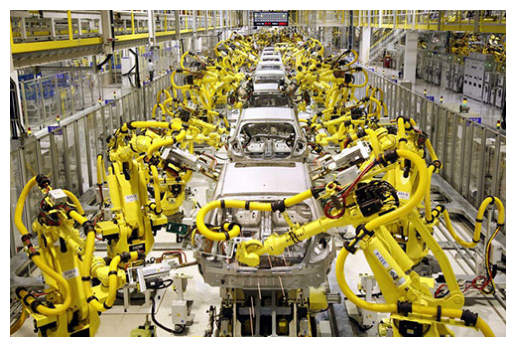

In [10]:
display_local_image("/home/chwenjun225/Projects/Foxer/images/robot_day_chuyen_sx_oto1.jpg")
base64_image = encode_image("/home/chwenjun225/Projects/Foxer/images/robot_day_chuyen_sx_oto1.jpg")

In [11]:
messages = [
	{
		"role": "user", 
		"content": [
			{
				"type": "text",
				"text": "List all the objects on this mage."
			}, 
			{
				"type": "image_url", 
				"image_url": {
					"url": f"data:image/jpg;base64,{base64_image}"
				}
			}
		]
	}
]
rocket_spaceship_result = llama32(messages)
print(rocket_spaceship_result)

The image shows a car manufacturing plant with several objects visible. Here is a list of the objects in the image:

1. Cars: There are several cars in various stages of assembly, including a white car in the foreground and several others in the background.
2. Yellow pipes: The pipes are used to transport fluids, gases, or other materials throughout the plant. They are connected to various machines and equipment.
3. Machines: There are several machines visible in the image, including robotic arms, welding machines, and other types of machinery used in the manufacturing process.
4. Conveyors: The conveyors are used to move parts and components around the plant. They are typically made of metal or plastic and have rollers or belts that allow them to move smoothly.
5. Electrical panels: The electrical panels are used to control the power supply to the machines and equipment in the plant. They are typically located near the machines and are used to distribute power and monitor the electric

In [12]:
messages = [
	{
		"role": "user", 
		"content": [
			{
				"type": "text", 
				"text": "What is this type of industrial robot called?"
			}, 
			{
				"type": "image_url", 
				"image_url": {
					"url": f"data:image/jpg;base64,{base64_image}"
				}
			}
		]
	}
]
result = llama32(messages)
print(result)

This type of industrial robot is called a "flexible manufacturing system" or FMS.
